# Login

In [2]:
%matplotlib notebook
import os
import sys
import asyncio
import numpy as np
import matplotlib.pyplot as plt
import qulab
from qulab.tools.wavedata import *

In [3]:
#print(qulab.admin.get_database())
#qulab.admin.get_collection_info()
#qulab.admin.drop_collection(database='qubit_measurement',
#                            collection=['instrument','record','driver'])
qulab.admin.set_database('qubit_measurement')

The recent database is "qubit_measurement".
The following databases are already exist:
['admin', 'config', 'local', 'qubit_measurement']
Your recent selected database already is "qubit_measurement".


In [4]:
#qulab.admin.register()

In [5]:
qulab.login('liuqichun','123456')

# Load driver and instrument

In [5]:
## 加载驱动，由于x6_1000的驱动依赖于自定义封装的动态库文件，所以需要将原始路径添加到python系统环境下
path='E:/2.code/Quantum_Lab/qulab/drivers'
for f in os.listdir(path):
    path_f = os.path.join(path, f)
    qulab.admin.uploadDriver(path_f)
    if os.path.isdir(path_f):
        sys.path.append(path_f)

In [6]:
## 加载设备
## 采集卡的加载较特殊
qulab.admin.setInstrument('PNA', 'localhost', 'TCPIP::192.168.1.107', 'NetworkAnalyzer')
qulab.admin.setInstrument('PSG_MEAS', 'localhost', 'TCPIP::192.168.1.102', 'PSG_SignalGenerator')
qulab.admin.setInstrument('PSG_DRIVE', 'localhost', 'TCPIP::192.168.1.121', 'PSG_SignalGenerator')
qulab.admin.setInstrument('PSG_JPA', 'localhost', 'TCPIP::192.168.1.187', 'PSG_SignalGenerator')
qulab.admin.setInstrument('AWG5014', 'localhost', 'TCPIP::192.168.1.132', 'Tek_5014C')
qulab.admin.setInstrument('AWG_MEAS', 'localhost', 'TCPIP::192.168.1.133', 'Tek_5014C')
qulab.admin.setInstrument('ATT', 'localhost', 'TCPIP::192.168.1.101', 'J7211')
qulab.admin.setInstrument('UHFAWG', 'localhost', 'ZI::UHFAWG::DEV2316', 'ZurichInstrumentsUHF')
qulab.admin.setInstrument('RSA', 'localhost', 'TCPIP::192.168.1.109', 'Tek_5126B_SpectrumAanlyzer')
qulab.admin.setInstrument('ATS', 'localhost', 'ATS9870::SYSTEM1::1', 'AlazarTechDigitizer')
qulab.admin.setInstrument('X6', 'localhost', 'X6_1000M::DEVICE::0', 'X6_1000M')
qulab.admin.setInstrument('DC1', 'localhost', 'OTHER::192.168.1.20', 'PG_DC')
qulab.admin.setInstrument('DC2', 'localhost', 'OTHER::192.168.1.21', 'PG_DC')
qulab.admin.setInstrument('DC3', 'localhost', 'OTHER::192.168.1.22', 'PG_DC')

## 显示加载的驱动和设备
qulab.listInstruments()

| name | host | address | driver |
|:----|:----|:----|:----|
|ATS|localhost|ATS9870::SYSTEM1::1|AlazarTechDigitizer|
|ATT|localhost|TCPIP::192.168.1.101|J7211|
|AWG5014|localhost|TCPIP::192.168.1.132|Tek_5014C|
|AWG_MEAS|localhost|TCPIP::192.168.1.133|Tek_5014C|
|DC1|localhost|OTHER::192.168.1.20|PG_DC|
|DC2|localhost|OTHER::192.168.1.21|PG_DC|
|DC3|localhost|OTHER::192.168.1.22|PG_DC|
|PNA|localhost|TCPIP::192.168.1.107|NetworkAnalyzer|
|PSG_DRIVE|localhost|TCPIP::192.168.1.121|PSG_SignalGenerator|
|PSG_JPA|localhost|TCPIP::192.168.1.187|PSG_SignalGenerator|
|PSG_MEAS|localhost|TCPIP::192.168.1.102|PSG_SignalGenerator|
|RSA|localhost|TCPIP::192.168.1.109|Tek_5126B_SpectrumAanlyzer|
|UHFAWG|localhost|ZI::UHFAWG::DEV2316|ZurichInstrumentsUHF|
|X6|localhost|X6_1000M::DEVICE::0|X6_1000M|

In [ ]:
qulab.listApps()

# config info

## init config file

In [6]:
setting_dict = {'config_dir': r'E:\1.experiment\auto_meas_app',
                'config_file': 'config_info.yaml',
                'circuit_list': ['Qubit0','Qubit1','Qubit2'],
                'Load_config': False}
meas_config_app = qulab.make_app('auto_meas.meas_config').with_settings(setting_dict)
meas_config_app.run()

The config file is already existed and has been renamed as "config_info_test_backup.yaml".
A new config file has been created.


## load config

In [9]:
meas_config_app = qulab.make_app('auto_meas.meas_config')
config = await meas_config_app.done()
config = config[0]

## update carry

In [15]:
update_config_carry_app = qulab.make_app('auto_meas.update_config_carry')
config = await update_config_carry_app.done()
config = config[0]

## delet auto_meas record history

In [14]:
from qulab.tools.fileprocess._fileprocess import *
apps = qulab.db.schema.app.listApplication(package='auto_meas')
for app in list(apps):
    fullname = str(app).split(' ')[1]
    del_record(database='qubit_measurement',fullname=fullname,index=['all',])

# IQ calibration

## IQ_leakage_calibration

Image(value=b'', format='svg+xml')

I_offset_result: -0.0135
Q_offset_result: 0.0015


<IPython.core.display.Javascript object>


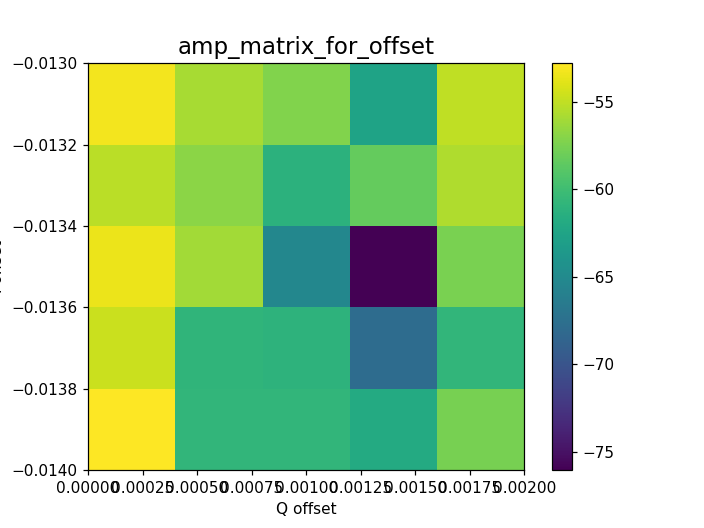

In [131]:
setting_dict = {'circuit_list': ['Qubit1',],
                'IQ_type': 'drive',
                'I_offset_list': np.linspace(-0.014,-0.013,5),
                'Q_offset_list': np.linspace(0.000,0.002,5)}
app = qulab.make_app('auto_meas.IQ_leakage_calibration').with_settings(setting_dict)
qulab.make_figure_for_app(app)
data = await app.done()
fig = plt.figure()
app.plot(fig, data)

## IQ mismatch calibration

In [ ]:
setting_dict = {'circuit_list': ['Qubit1',],
                'IQ_type': 'drive',
                'I_amp_list': np.linspace(0.993, 0.995, 4),
                'Q_phase_list': np.linspace(-0.5, 0.0, 6)}
app = qulab.make_app('auto_meas.IQ_mismatch_calibration').with_settings(setting_dict)
qulab.make_figure_for_app(app)
data = await app.done()
fig = plt.figure()
app.plot(fig, data)

# set  meas awg and bias

## set awg

In [117]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',],}
app = qulab.make_app('auto_meas.set_meas_awg').with_settings(setting_dict)
app.run()

## delet awg history

In [58]:
from qulab.tools.fileprocess._fileprocess import *
del_record(database='qubit_measurement',fullname='AWG.awg_generate_waveform',index=['all',])

## set qubit bias

In [276]:
qubit_list = ['Qubit0','Qubit1',]

meas_config_app = qulab.make_app('auto_meas.meas_config')
config = await meas_config_app.done()
config = config[0]

for Q in qubit_list:
    DC = qulab.open_resource(config['bias_info'][Q]['inst_source'])
    DC.setValue('Offset',config['bias_info'][Q]['amp'],ch=config['bias_info'][Q]['ch'])
    await asyncio.sleep(0.2)

# set all inst

In [221]:
mw_drive = qulab.open_resource('PSG_DRIVE')
mw_drive.setValue('Power', 20)
mw_drive.setValue('Frequency', 4.4e9)
mw_drive.setValue('Output', 'ON')

Driver(addr=TCPIP::192.168.1.121)

In [182]:
mw_meas = qulab.open_resource('PSG_MEAS')
mw_meas.setValue('Power', 23)
mw_meas.setValue('Frequency', 6.63e9)
mw_meas.setValue('Output', 'ON')

Driver(addr=TCPIP::192.168.1.102)

In [122]:
mw_jpa = qulab.open_resource('PSG_JPA')
mw_jpa.setValue('Power', 8.7)

Driver(addr=TCPIP::192.168.1.187)

In [ ]:
pna = qulab.open_resource('PNA')
pna.setValue('Output', 'OFF')

In [ ]:
setting_dict = {'freq_list': np.linspace(-75e6,75e6,601)+6.535e9,
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.single_S21').with_settings(setting_dict)
app.run()

# JPA

In [257]:
dc = qulab.open_resource('DC3')
dc.setValue('Offset',0.068,ch=1)

Driver(addr=192.168.1.22)

## find jpa working point

In [104]:
setting_dict = {'bias_list': np.linspace(0.07,0.08,11),
                'power_list': np.linspace(6,10,9),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.find_jpa_working_point').with_settings(setting_dict)
app.run()

Image(value=b'', format='svg+xml')

# find qubit

## single S21

### with pna

In [ ]:
setting_dict = {'freq_list': np.linspace(-2e6,2e6,41)+6.63e9,
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.S21_with_pna').with_settings(setting_dict)
app.run()

### with ATS

In [ ]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'freq_list': np.linspace(-100e6,100e6,401)+6.53e9+35723,
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.S21_with_ATS').with_settings(setting_dict)
app.run()

## cavity shift

### with pna

In [8]:
setting_dict = {'freq_list': np.linspace(6.460e9,6.610e9,601)+303873,
                'amp_list': np.linspace(-40,-10,31),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.cavity_shift_with_pna').with_settings(setting_dict)
app.run()

Image(value=b'', format='svg+xml')

### with ATS

In [ ]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'freq_list': np.linspace(6.460e9,6.610e9,601)+303873,
                'amp_list': np.linspace(1,0.1,6),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.cavity_shift_with_ATS').with_settings(setting_dict)
app.run()

## vacuum rabi splitting

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


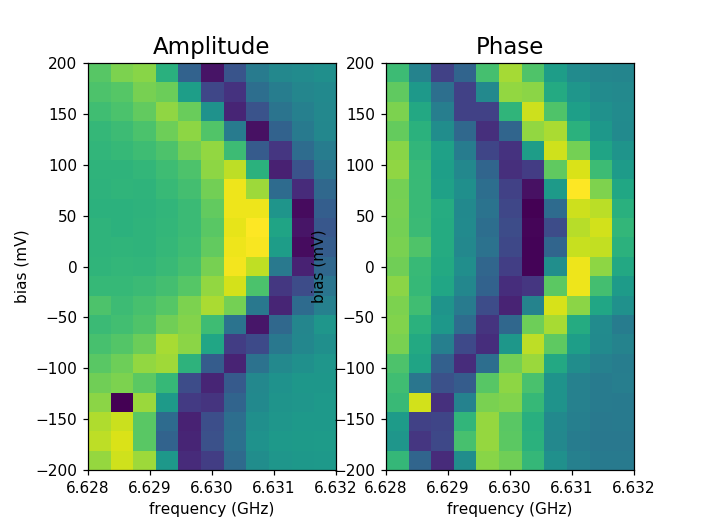

In [62]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'freq_list': np.linspace(-2e6,2e6,11)+6.63e9,
                'bias_list': np.linspace(-0.2,0.2,21),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.vacuum_rabi_splitting').with_settings(setting_dict)
app.run()

## spectroscopy line

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


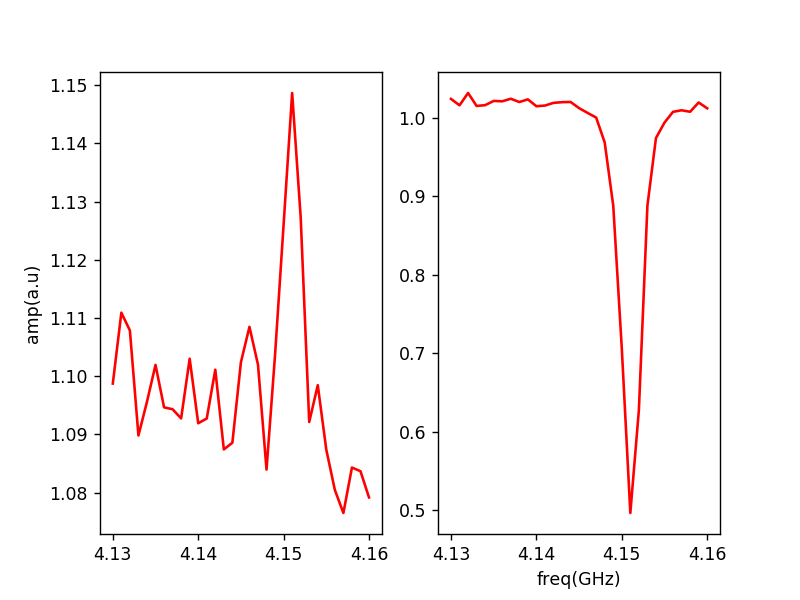

In [273]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'freq_list': np.linspace(4.13e9,4.16e9,31),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.spectroscopy_line').with_settings(setting_dict)
app.run()

## 3D spectroscopy

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


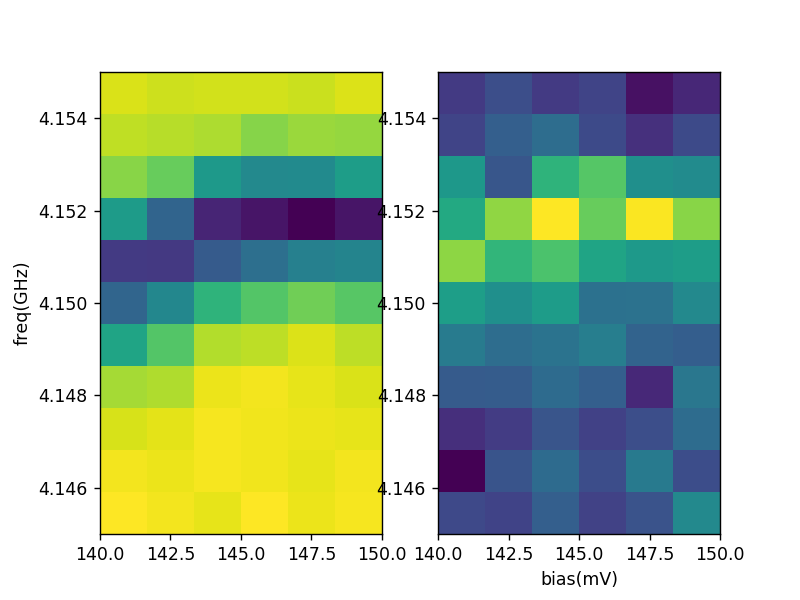

In [275]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'freq_list': np.linspace(4.145e9,4.155e9,11),
                'bias_list': np.linspace(-0.005,0.005,6)+0.145,
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.three_dim_spectroscopy').with_settings(setting_dict)
app.run()

## 3D spectroscopy sweep z control

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


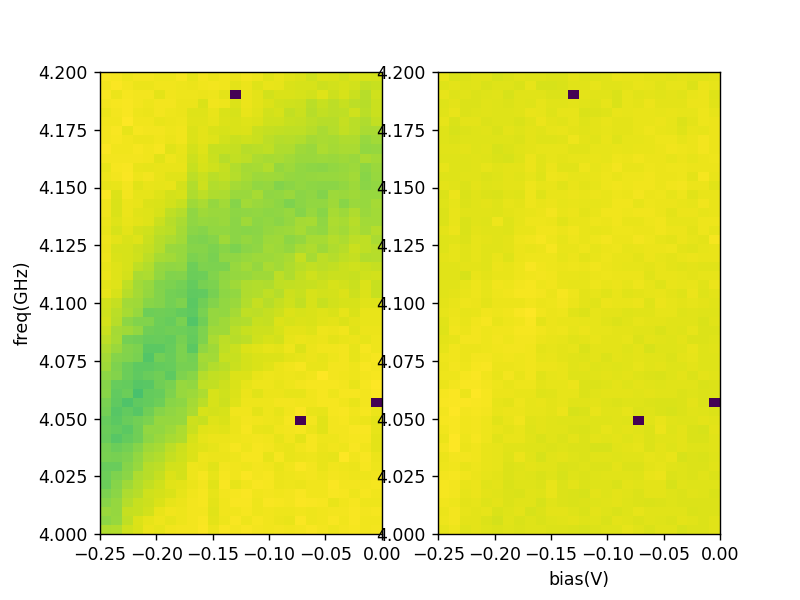

In [139]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'freq_list': np.linspace(4.00e9,4.20e9,51),
                'bias_list': np.linspace(-0.25,0.0,26),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.three_dim_spectroscopy_sweep_z_control').with_settings(setting_dict)
app.run()

# find readout point

## find readout freq

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


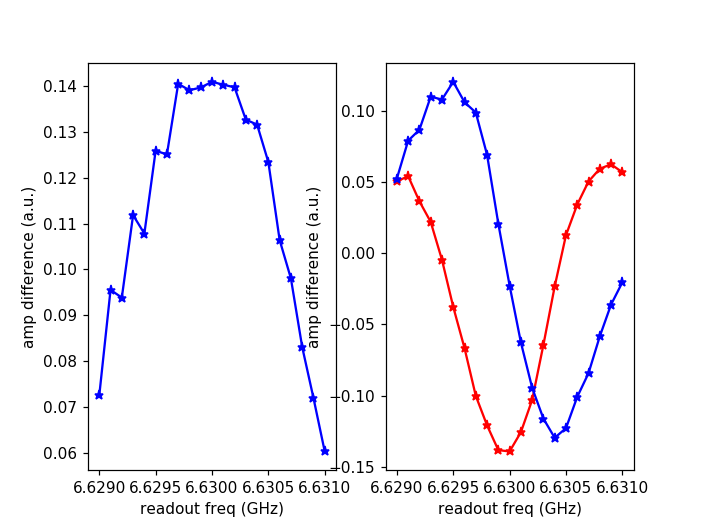

In [48]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'freq_list': np.linspace(-1e6,1e6,21)+6.63e9,
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.find_readout_freq').with_settings(setting_dict)
app.run()

## find readout freq and amp

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


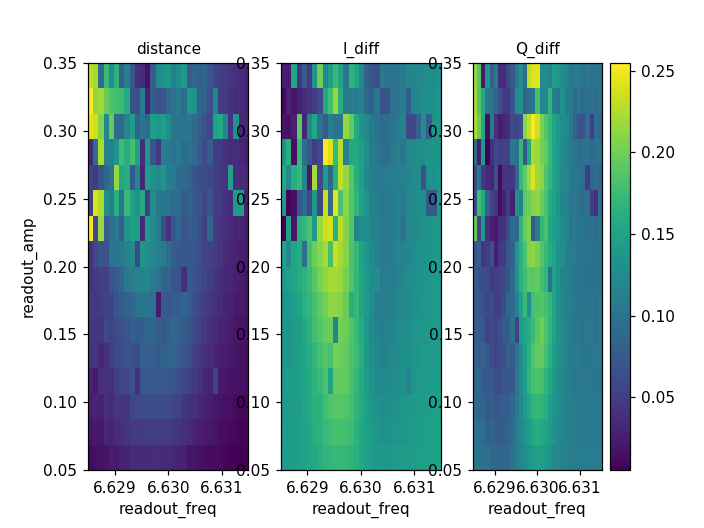

In [132]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'freq_list': np.linspace(-1.5e6,1.5e6,31)+6.63e9,
                'amp_list': np.linspace(0.05,0.35,16),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.find_readout_freq_and_amp').with_settings(setting_dict)
app.run()

## find readout freq and amp for single shot

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


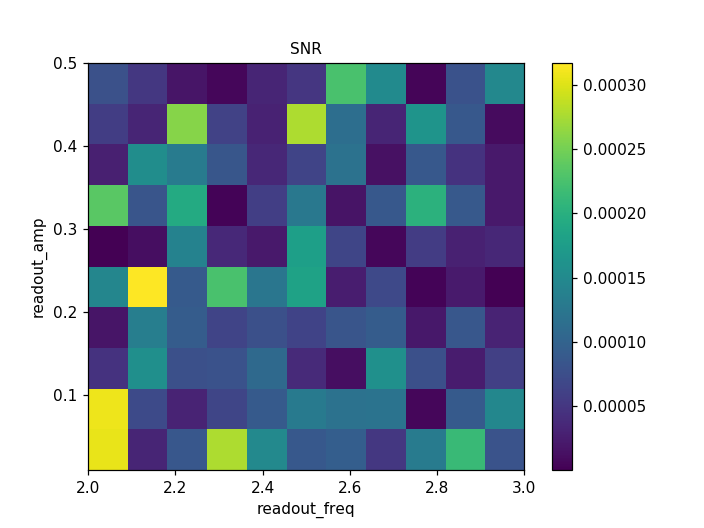

In [29]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'freq_list': np.linspace(2e9,3e9,11),
                'amp_list': np.linspace(0.01,0.5,10),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.find_readout_freq_and_amp_for_single_shot').with_settings(setting_dict)
app.run()

## single shot

### acquire single line

#### no drive

<IPython.core.display.Javascript object>


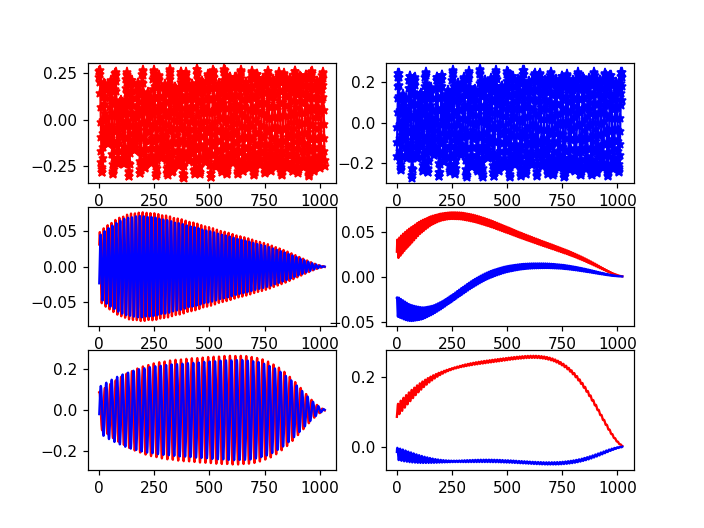

In [190]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]}
app = qulab.make_app('auto_meas.ats_acquire_single_line').with_settings(setting_dict)
data = await app.done()
fig = plt.figure()
app.plot(fig, data)

#### with drive

<IPython.core.display.Javascript object>


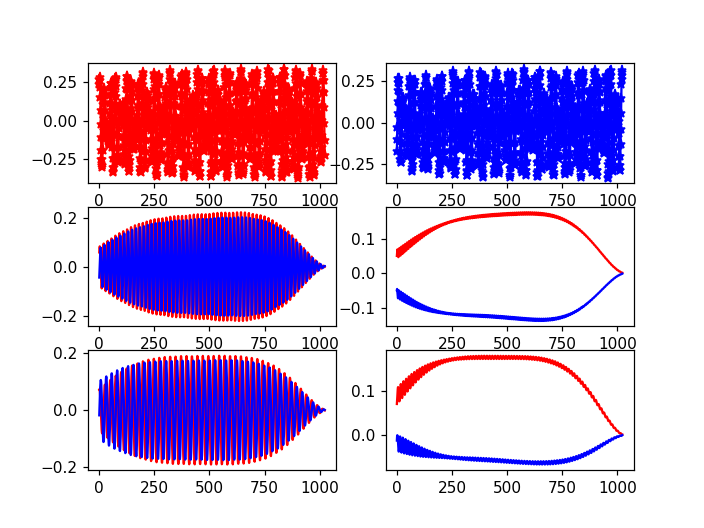

In [189]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]}
app = qulab.make_app('auto_meas.ats_acquire_single_line').with_settings(setting_dict)
data = await app.done()
fig = plt.figure()
app.plot(fig, data)

### drive Q9

<IPython.core.display.Javascript object>


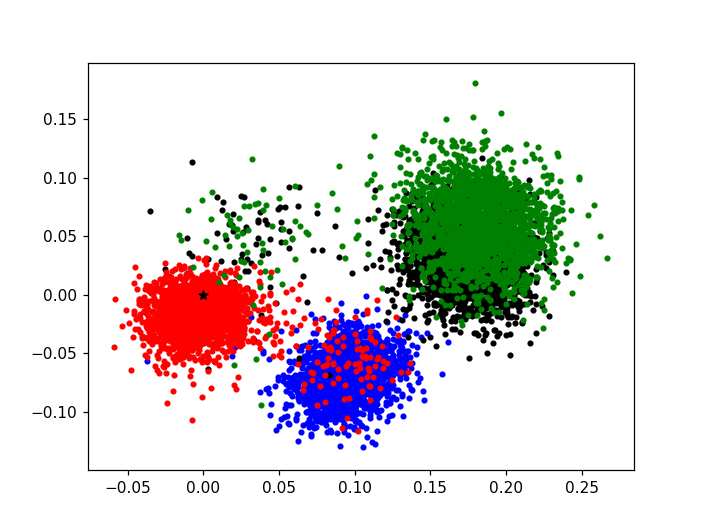

ground center: [[0.0941018679911531, -0.06876460901994955], [0.16809302524673864, 0.03165694634198824]]
excited center: [[0.0008282476504505406, -0.019584922656394225], [0.1774086919782346, 0.059791743409400674]]
ground prob array: [0.951171875, 0.01318359375, 0.03515625, 0.00048828125]
excited prob array: [0.04296875, 0.92236328125, 0.00341796875, 0.03125]


In [133]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]}
app = qulab.make_app('auto_meas.single_shot_for_ground_and_excited_state').with_settings(setting_dict)
data = await app.done()
fig = plt.figure()
app.plot(fig, data)

### drive Q10

<IPython.core.display.Javascript object>


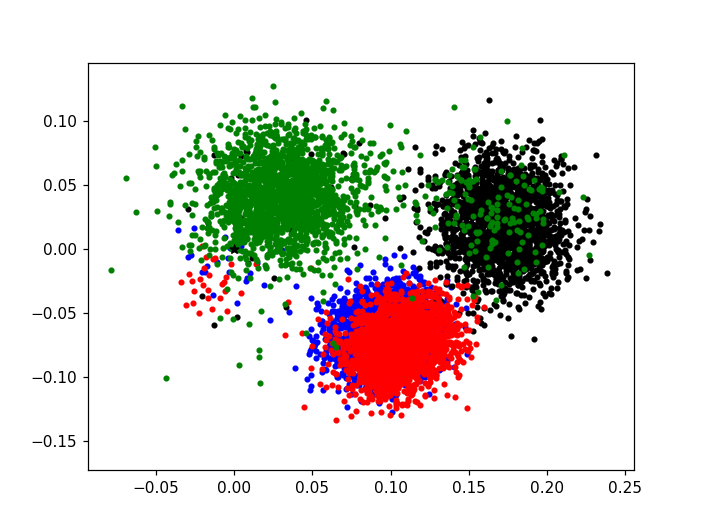

ground center: [[0.09326536776861094, -0.06463057764147105], [0.16621855765935054, 0.02069082353196481]]
excited center: [[0.10407402722789866, -0.07370864048326262], [0.0396294964254805, 0.04061110903856366]]
ground prob array: [0.94775390625, 0.0146484375, 0.0361328125, 0.00146484375]
excited prob array: [0.07373046875, 0.00244140625, 0.91162109375, 0.01220703125]


In [127]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]}
app = qulab.make_app('auto_meas.single_shot_for_ground_and_excited_state').with_settings(setting_dict)
data = await app.done()
fig = plt.figure()
app.plot(fig, data)

### drive Q9 and Q10

<IPython.core.display.Javascript object>


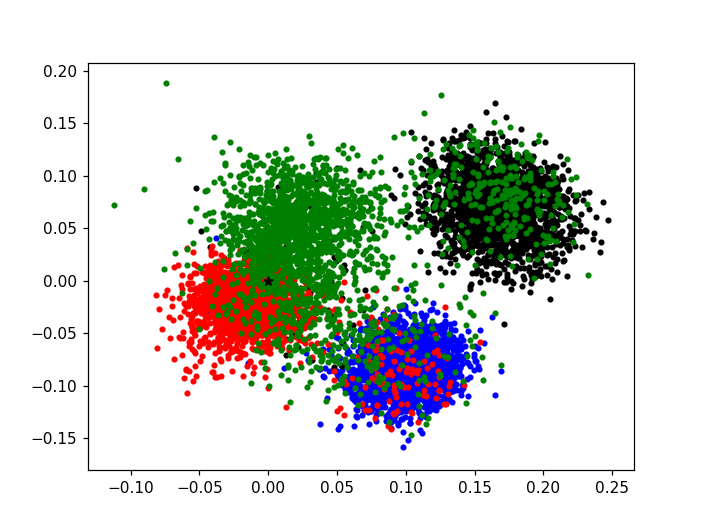

ground center: [[0.09898692451646524, -0.08187988457027419], [0.16187267169658967, 0.06849749533147423]]
excited center: [[-0.009029501870547303, -0.025758560978032273], [0.04642672552019128, 0.0364363347353653]]
ground prob array: [0.94384765625, 0.0146484375, 0.04052734375, 0.0009765625]
excited prob array: [0.0087890625, 0.13671875, 0.04638671875, 0.80810546875]


In [112]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]}
app = qulab.make_app('auto_meas.single_shot_for_ground_and_excited_state').with_settings(setting_dict)
data = await app.done()
fig = plt.figure()
app.plot(fig, data)

# base characterization

## rabi line sweep drive amp

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


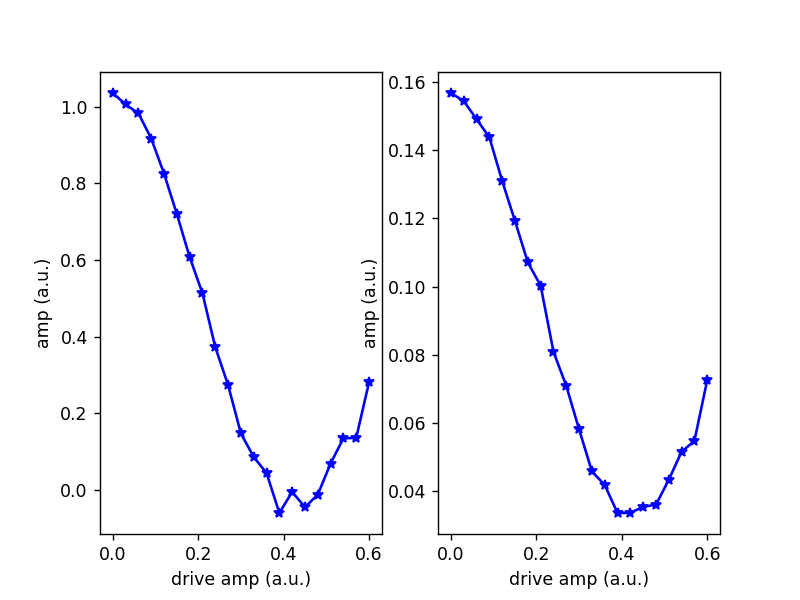

In [268]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'amp_list': np.linspace(0.0,0.6,21),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.rabi_line_sweep_drive_amp').with_settings(setting_dict)
app.run()

## rabi line sweep drive time

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


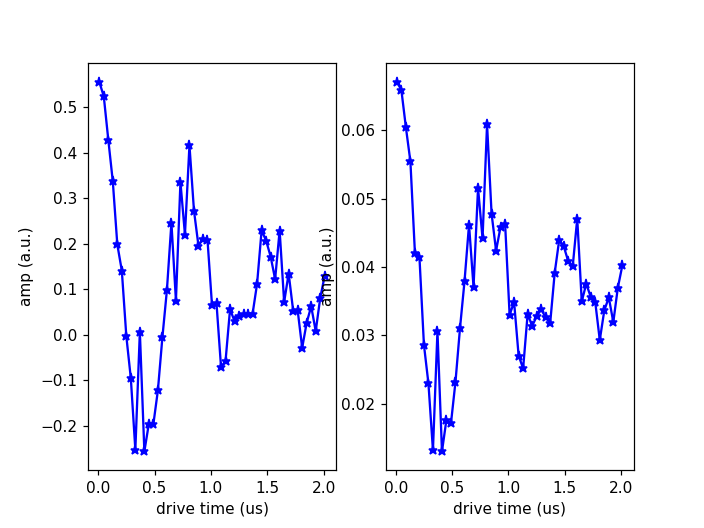

In [190]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'time_list': np.linspace(10e-9,2.01e-6,51),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.rabi_line_sweep_drive_time').with_settings(setting_dict)
app.run()

## T1

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


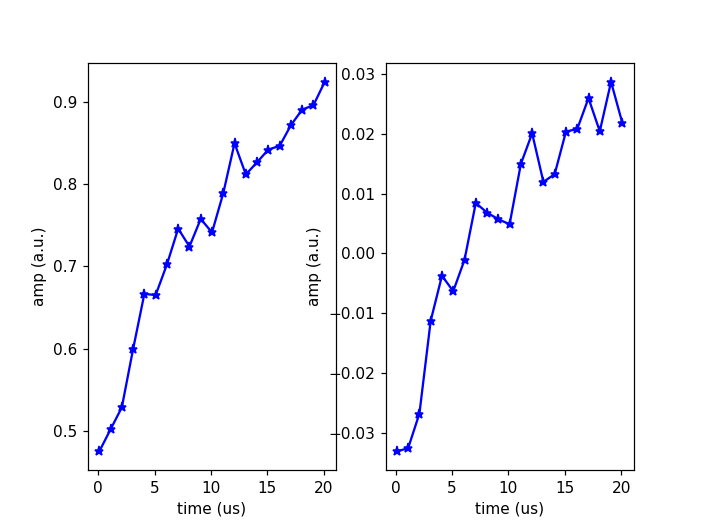

In [196]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'time_list': np.linspace(100e-9,20.1e-6,21),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.T1_line').with_settings(setting_dict)
app.run()

## ramsey line

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


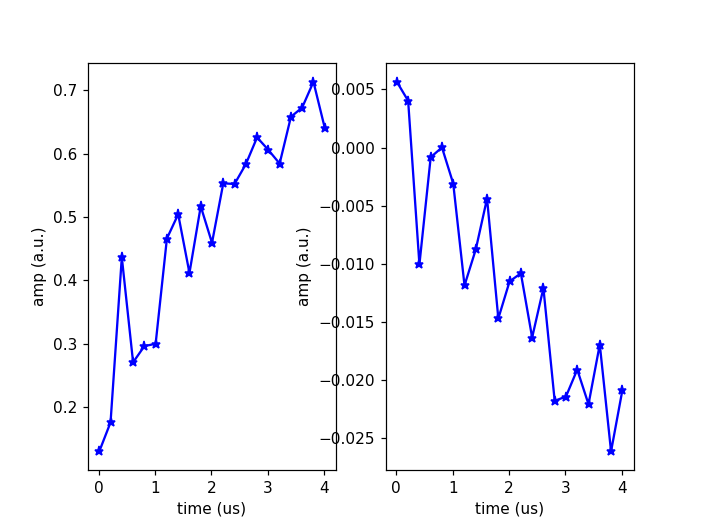

In [17]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'time_list': np.linspace(10e-9,4.01e-6,21),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.ramsey_line').with_settings(setting_dict)
app.run()

## ramsey sweep bias

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


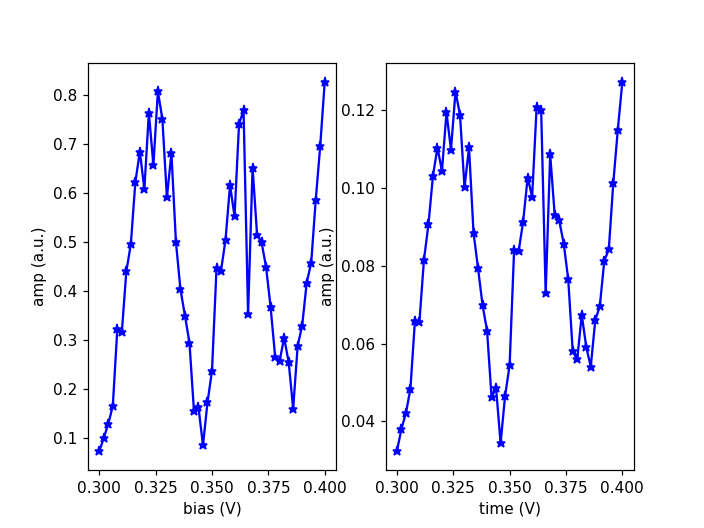

In [205]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'bias_list': np.linspace(0.3,0.4,51),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.ramsey_sweep_bias').with_settings(setting_dict)
app.run()

## echo line

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


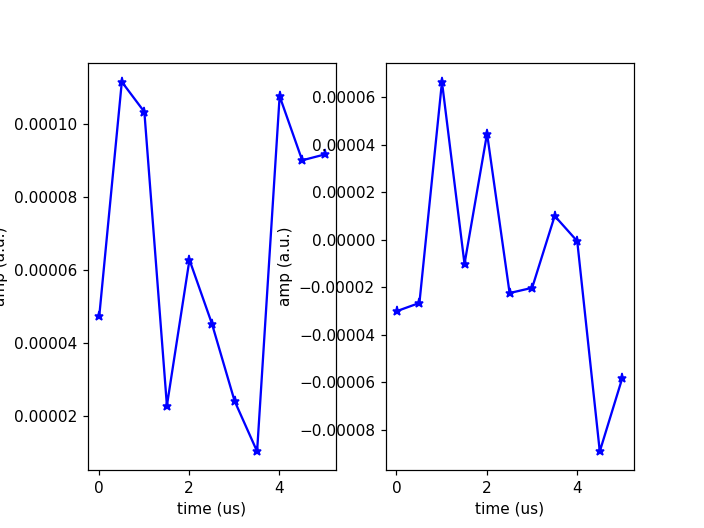

In [49]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'time_list': np.linspace(10e-9,5.01e-6,11),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.echo_line').with_settings(setting_dict)
app.run()

# RBM

## rbm line

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


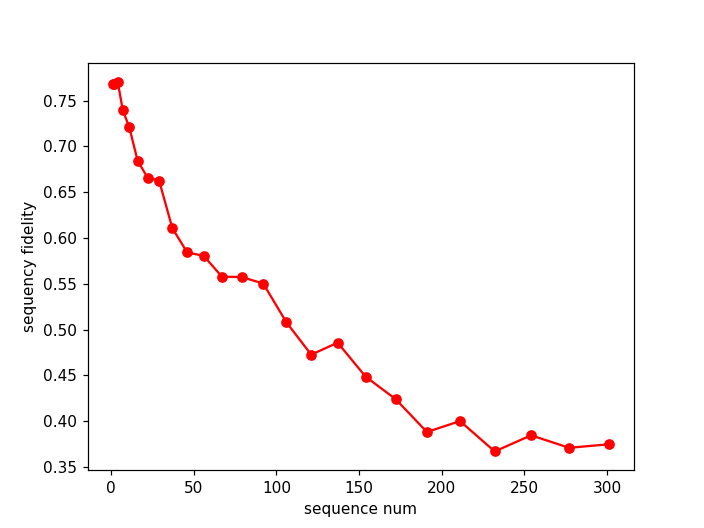

In [130]:
s_list = []
temp = 1
for idx in range(25):
    temp += idx
    s_list.append(temp)
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'target_gate_num': None,
                'rbm_repeat': 70,
                'sequence_num_list': s_list,
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.rbm_line').with_settings(setting_dict)
data = await app.done()

## rbm sweep f01 and another para

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


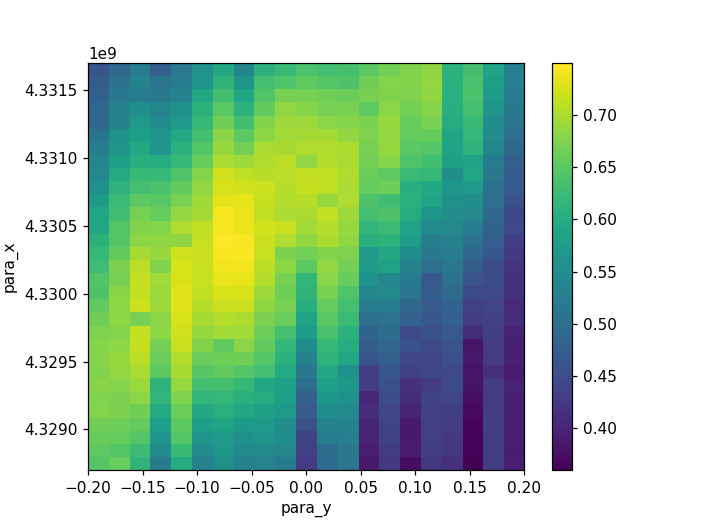

In [118]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'RBM_sweep_two_para': ['f01','DRAG_ratio'],
                'sequence_num': 30,
                'repeat_num': 40,
                'freq_list': np.linspace(-1.5e6,1.5e6,31)+4.3302e9,
                'para_list':np.linspace(-0.20,0.20,21),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.rbm_sweep_f01_and_another_para').with_settings(setting_dict)
data = await app.done()

## rbm sweep one para

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


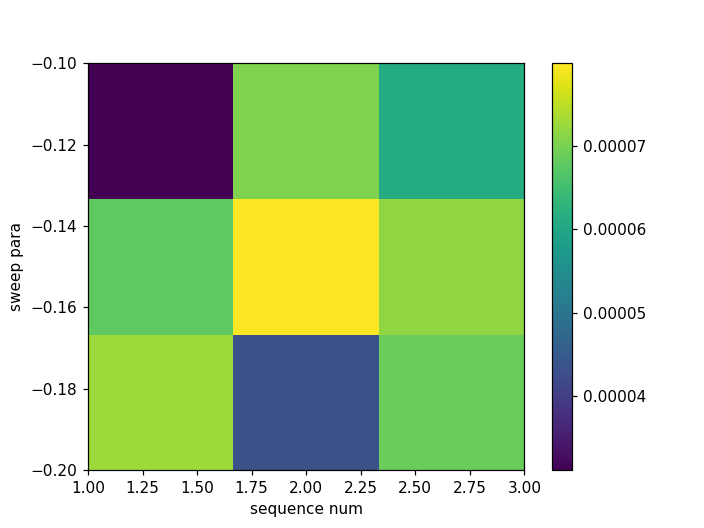

In [59]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'RBM_sweep_para': 'DRAG_ratio',
                'rbm_repeat': 5,
                'sequence_num_list': np.linspace(1,3,3),
                'para_list':np.linspace(-0.2,-0.1,3),
                'save_result': True,
                'delet_record': True}
app = qulab.make_app('auto_meas.rbm_sweep_one_para').with_settings(setting_dict)
app.run()

# QST

## QST for rabi line sweep drive time

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


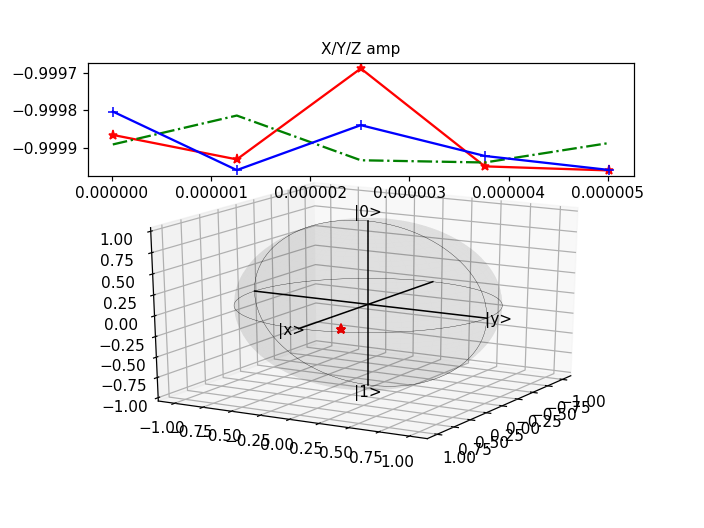

In [67]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'time_list':np.linspace(10e-9,5.01e-6,5),
                'QST_index': ['Y2p','X2n','I'],
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.qst_for_rabi_line_sweep_drive_time').with_settings(setting_dict)
app.run()

## QST for rabi line sweep drive amp

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


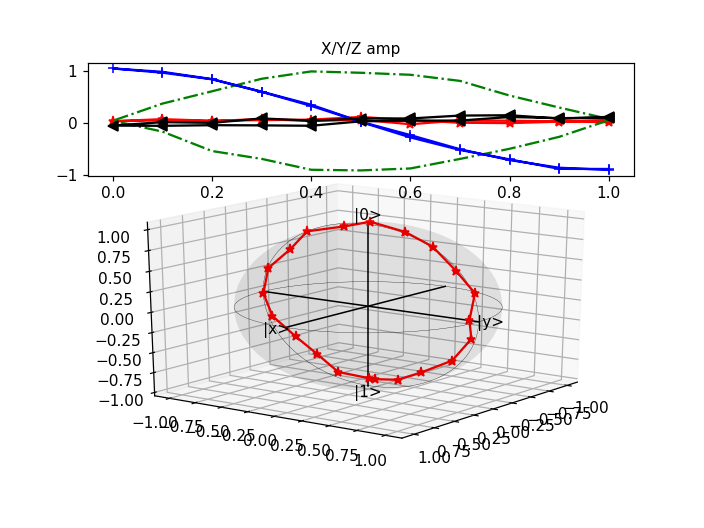

In [264]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'amp_list':np.linspace(-1.0,1.0,21),
                'QST_index': ['Y2p','X2n','I'],
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.qst_for_rabi_line_sweep_drive_amp').with_settings(setting_dict)
app.run()

## QST for T1

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


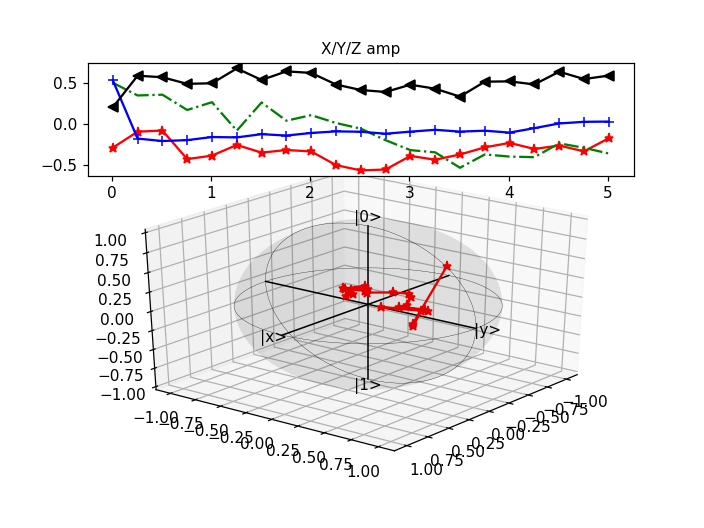

In [62]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'delay_list':np.linspace(10e-9,5.01e-6,21),
                'QST_index': ['Y2p','X2n','I'],
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.qst_for_T1').with_settings(setting_dict)
app.run()

# RTO

## RTO find delay

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


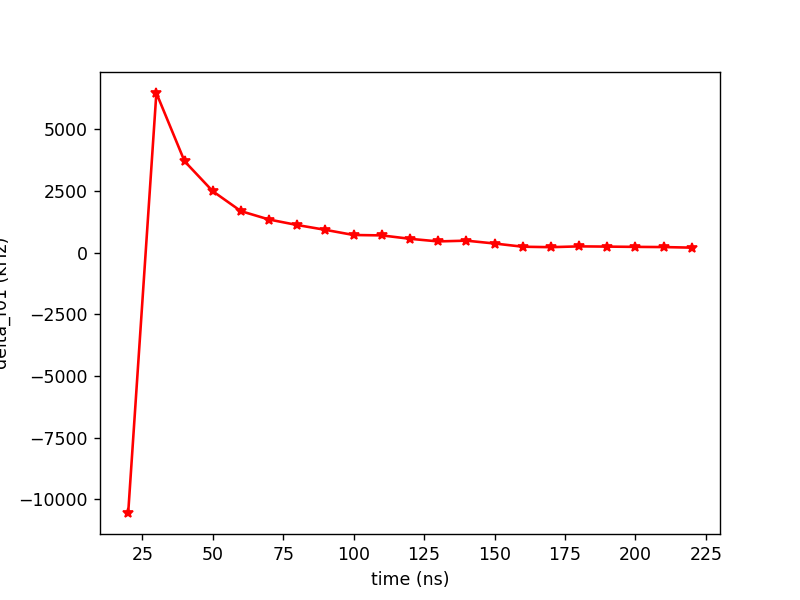

In [278]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'delay_list':np.linspace(20e-9,220e-9,21),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.rto_find_delay').with_settings(setting_dict)
app.run()

## RTO line

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


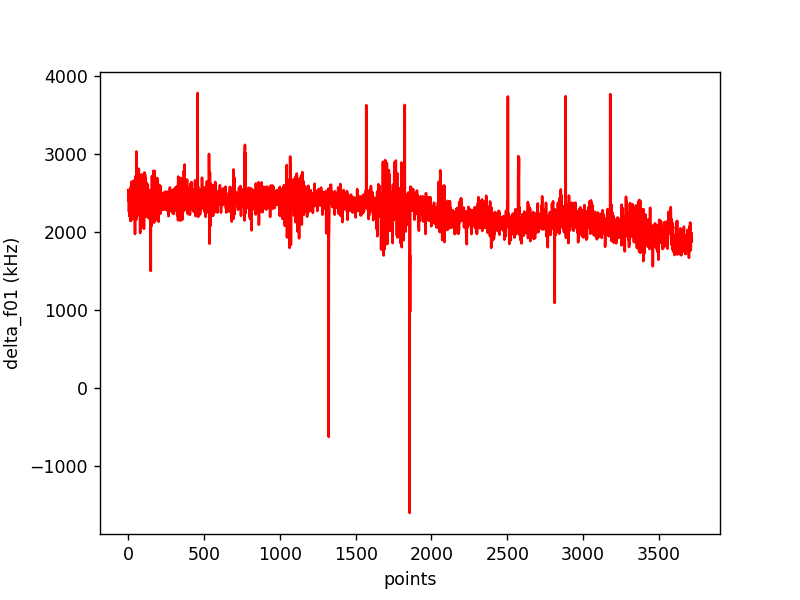

In [279]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'RTO_points': 10000,
                'delay_time': 50e-9,
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.rto_line').with_settings(setting_dict)
app.run()

# Two bits

## marker calibration

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


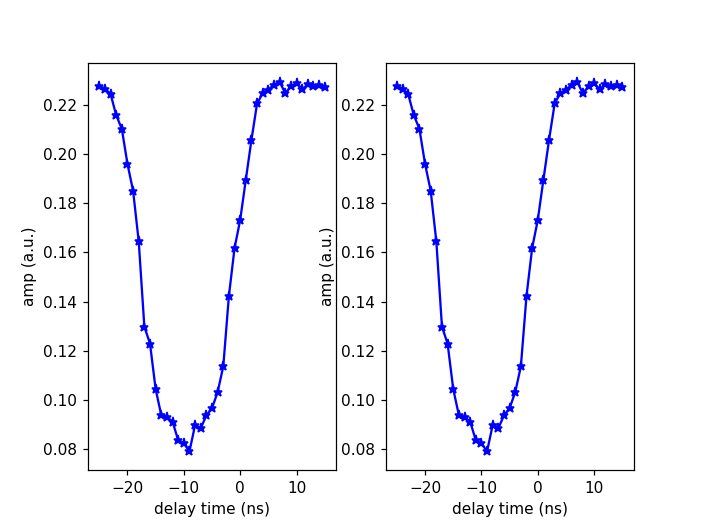

In [125]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'delay_list':np.linspace(-15e-9,15e-9,31),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.xy_mk_calibration').with_settings(setting_dict)
app.run()

## xy_z calibration

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


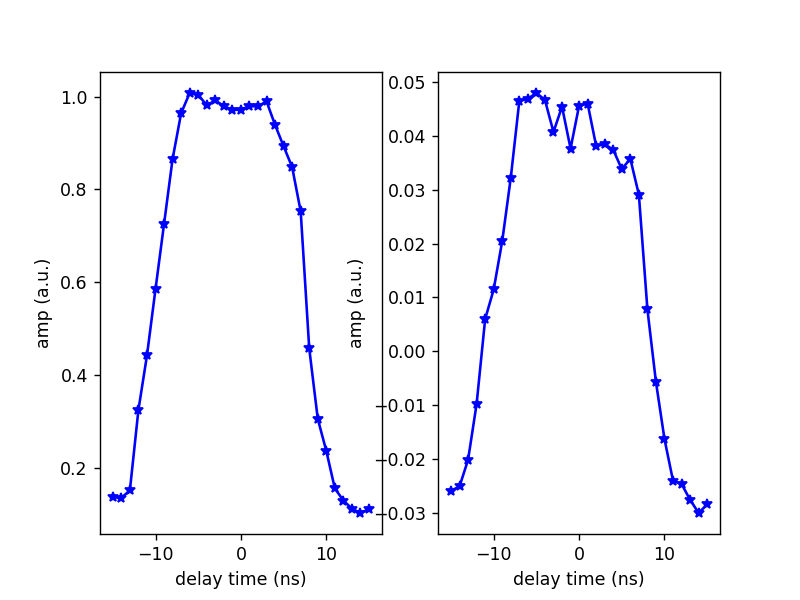

In [103]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'delay_list':np.linspace(-15e-9,15e-9,31),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.xy_z_calibration').with_settings(setting_dict)
app.run()

## z cross talk calibration

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


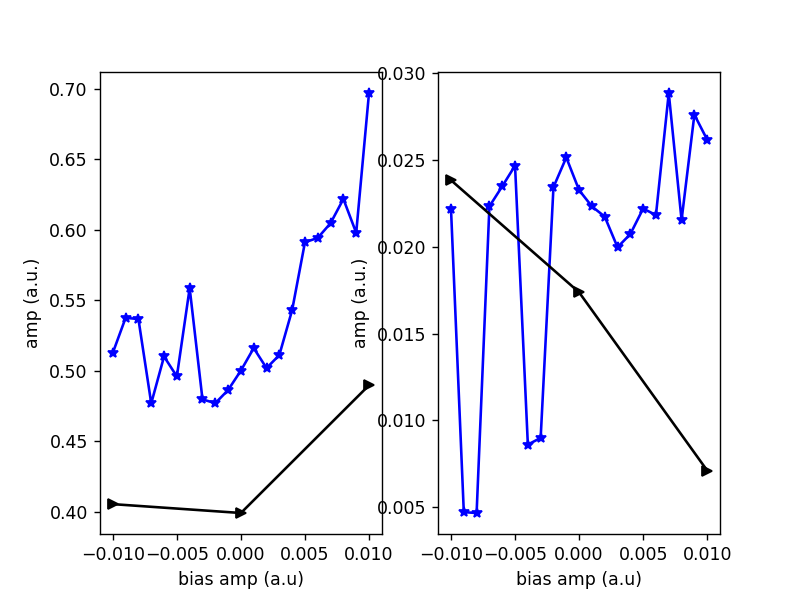

In [109]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'bias_list':np.linspace(-0.01,0.01,21),
                'ramsey_delay_time': 100e-9,
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.z_cross_talk_calibration').with_settings(setting_dict)
app.run()

## state swap sweep bias

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


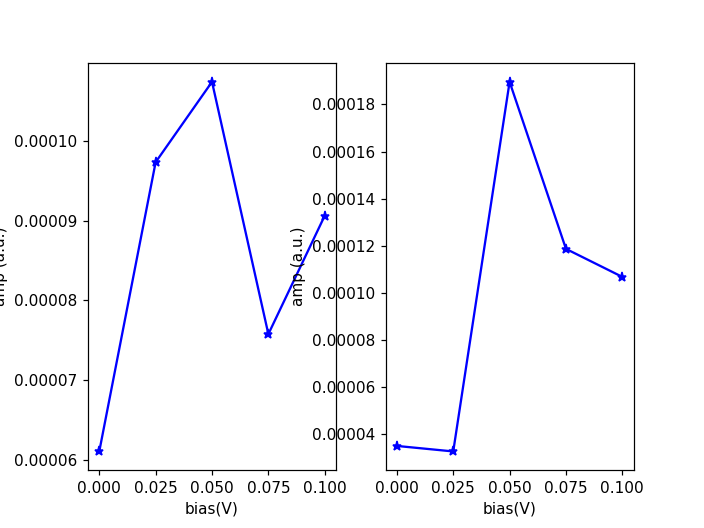

In [82]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'bias_list':np.linspace(0,0.1,5),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.state_swap_sweep_bias').with_settings(setting_dict)
app.run()

## state swap sweep time

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


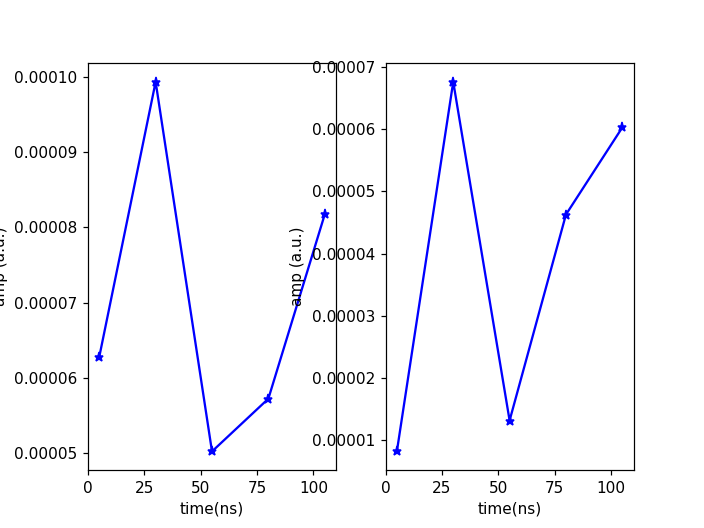

In [83]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'time_list':np.linspace(5e-9,105e-9,5),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.state_swap_sweep_time').with_settings(setting_dict)
app.run()

## 3D state swap

In [85]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'time_list':np.linspace(5e-9,105e-9,11),
                'bias_list':np.linspace(0,0.4,5),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.three_dim_state_swap').with_settings(setting_dict)
app.run()

Image(value=b'', format='svg+xml')

## cphase calibration line

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


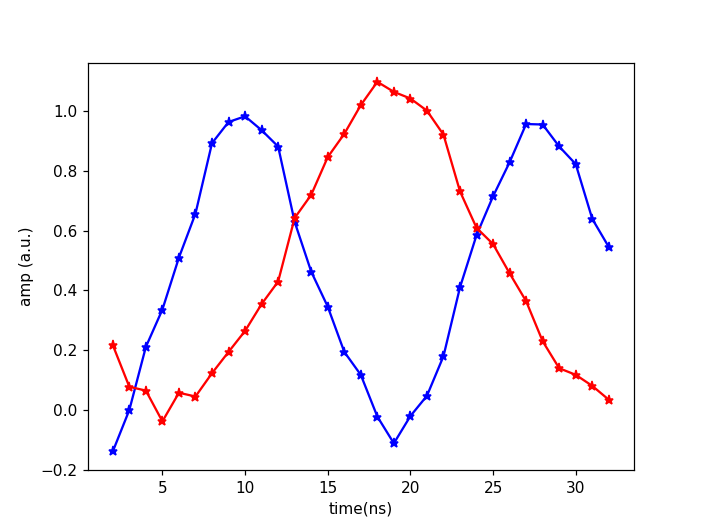

In [255]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'time_list':np.linspace(2e-9,32e-9,31),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.cphase_calibration_line_sweep_time').with_settings(setting_dict)
app.run()

## 3D cPhase calibration

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


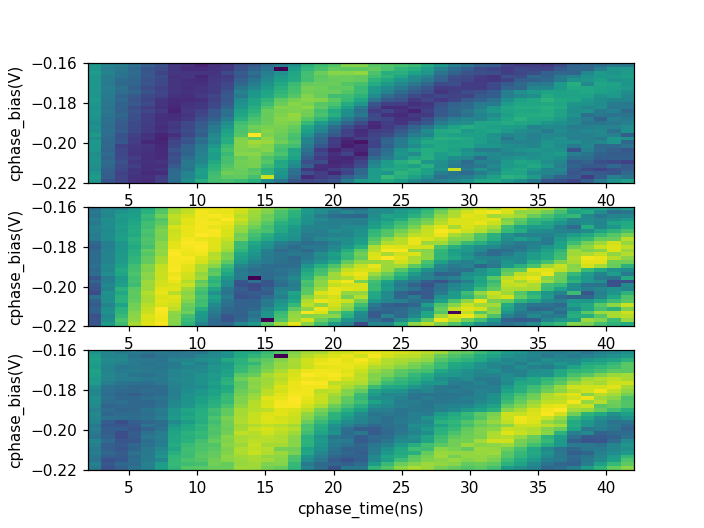

In [180]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'time_list':np.linspace(2e-9,42e-9,41),
                'bias_list':np.linspace(-0.22,-0.16,31),
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.three_dim_cphase_calibration').with_settings(setting_dict)
app.run()

## two qubit state prepare

Image(value=b'', format='svg+xml')

<IPython.core.display.Javascript object>


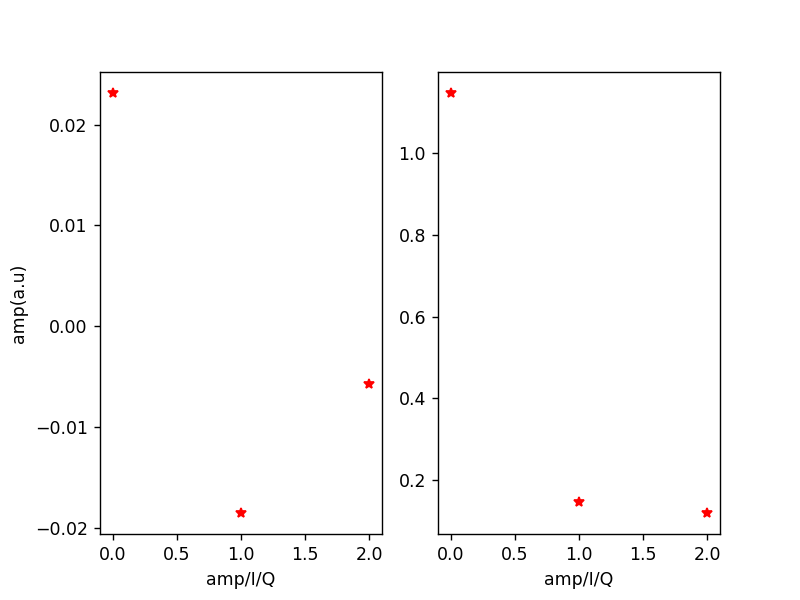

In [196]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'pre_drive':['X1',],
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.two_qubit_state_prepare').with_settings(setting_dict)
app.run()

## two qubit state prepare and qst

<IPython.core.display.Javascript object>


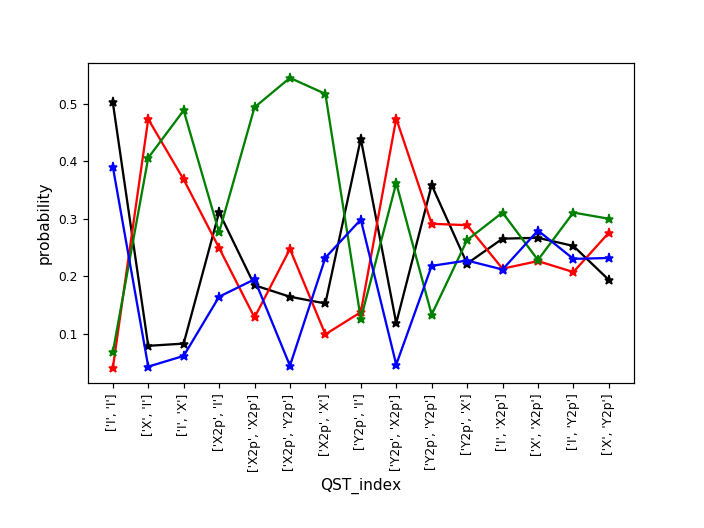

In [289]:
setting_dict = {'circuit_list': ['Qubit0','Qubit1',]
                'pre_drive':['Y2p2','Y2n1','CP2','Y2p1',],
                'save_result': False,
                'delet_record': False}
app = qulab.make_app('auto_meas.two_qubit_state_prepare_and_qst').with_settings(setting_dict)
app.run()

In [290]:
record = qulab.query('auto_meas.two_qubit_state_prepare_and_qst')
record_idx = record.count()-1
meas_data = record[record_idx].data[1:]
txt_path = 'E:/qubit_measurent_20200108/QST_by_matlab/meas_data.txt'
fid = open(txt_path,'w+')
for n in range(len(meas_data[0])):
    for idx in range(len(meas_data)):
            fid.write(str(meas_data[idx][n])+'    ')
    fid.write('\n')
fid.close()